In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/drug-classification/drug200.csv


## Import libraries to graph

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

## Data Characteristics

In [3]:
drug = pd.read_csv('/kaggle/input/drug-classification/drug200.csv')

drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
print(drug.isna().sum())
print("------------------------")
print(drug.isnull().sum())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64
------------------------
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [5]:
print(drug.info())
print('===========================')
print(drug.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None
              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000


## Graph Drug->Count

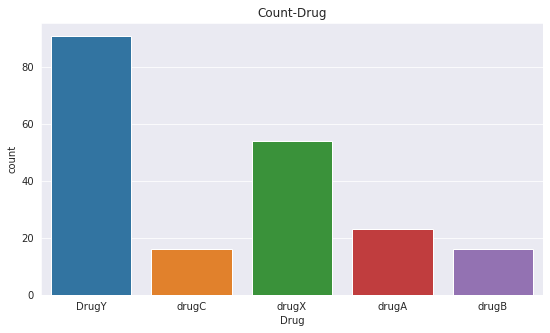

In [6]:
drug.Drug.value_counts()

plt.figure(figsize=(9,5))

sns.countplot(drug.Drug)
plt.title('Count-Drug')
plt.show()

## Graph Sex->Count

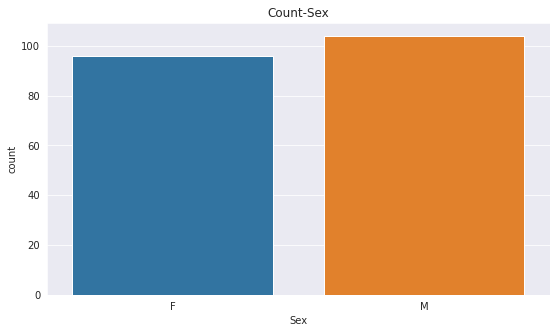

In [7]:
plt.figure(figsize=(9,5))

sns.countplot(drug.Sex)
plt.title('Count-Sex')
plt.show()

## Graph Age->Dist

Age-min: 15
Age-max: 74


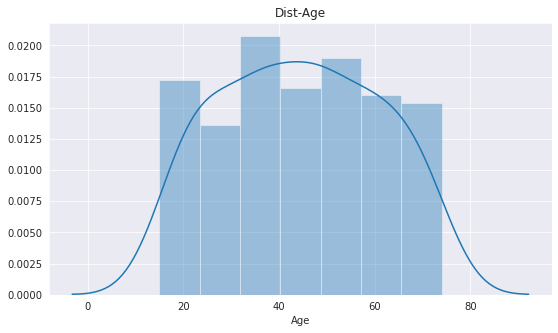

In [8]:
plt.figure(figsize=(9,5))

print('Age-min: {}'.format(drug.Age.min()))
print('Age-max: {}'.format(drug.Age.max()))

sns.distplot(drug.Age)
plt.title('Dist-Age')
plt.show()

## Graph BP->Count

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64


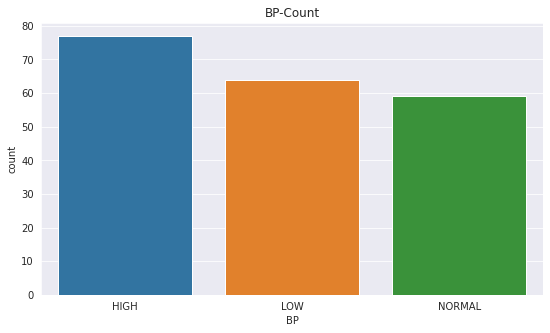

In [9]:
print(drug.BP.value_counts())

plt.figure(figsize=(9,5))

sns.countplot(drug.BP)
plt.title('BP-Count')
plt.show()

## Graph Na_to_K->Dist

Na_to_K min: 6.269
Na_to_K max: 38.247


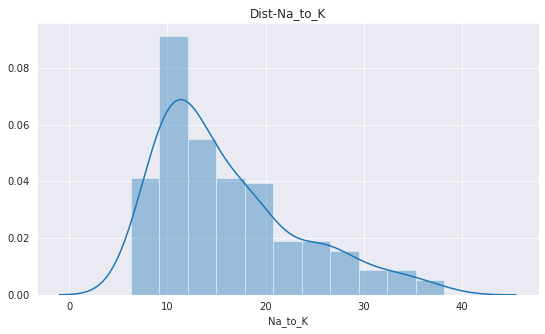

In [10]:
plt.figure(figsize=(9,5))

print('Na_to_K min: {}'.format(drug.Na_to_K.min()))
print('Na_to_K max: {}'.format(drug.Na_to_K.max()))

sns.distplot(drug.Na_to_K)
plt.title('Dist-Na_to_K')
plt.show()

## Graph Cholesterol->Count

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64


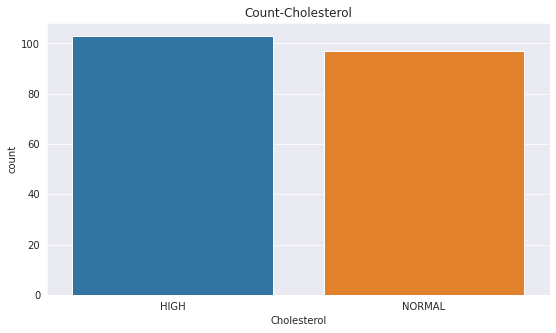

In [11]:
print(drug.Cholesterol.value_counts())

plt.figure(figsize=(9,5))

sns.countplot(drug.Cholesterol)
plt.title('Count-Cholesterol')
plt.show()


# Analysis all with Drug

## Graph Drug->Na_to_K

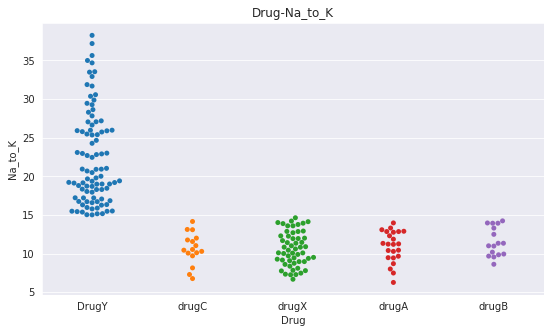

min DrugY: 15.015


In [12]:
plt.figure(figsize=(9,5))

sns.swarmplot(x='Drug', y='Na_to_K', data=drug)
plt.title('Drug-Na_to_K')
plt.show()

print('min DrugY: {}'.format(drug.Na_to_K[drug.Drug == 'DrugY'].min()))


# An important characteristic for DrugY

## Graph Drug->Age

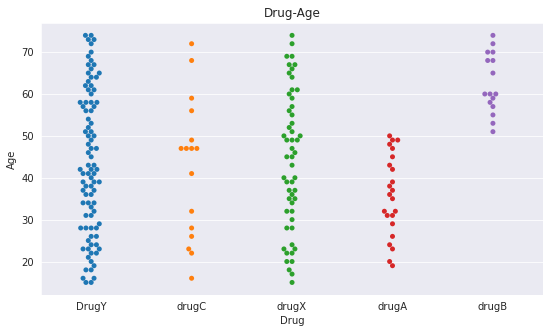

In [13]:
plt.figure(figsize=(9,5))

sns.swarmplot(x='Drug', y='Age', data=drug)
plt.title('Drug-Age')
plt.show()

#less important

## Graph Drug->Sex

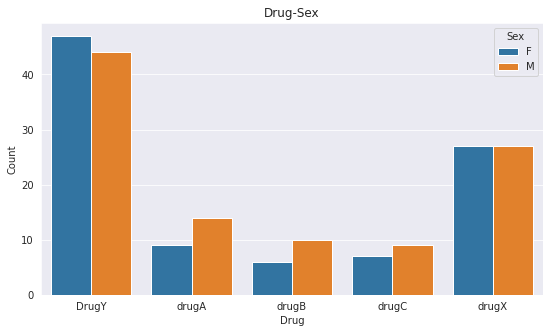

In [14]:
DrugSex = drug.groupby(['Drug', 'Sex']).size().reset_index(name='Count')

plt.figure(figsize=(9,5))

sns.barplot(x='Drug', y='Count', hue='Sex', data=DrugSex)
plt.title('Drug-Sex')
plt.show()

# Nothing important

## Graph Drug->BP

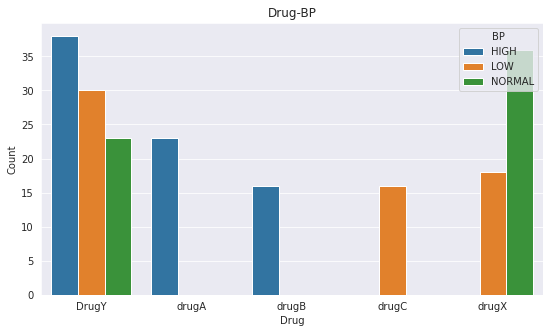

In [15]:
DrugBP = drug.groupby(['Drug', 'BP']).size().reset_index(name='Count')

plt.figure(figsize=(9,5))

sns.barplot(x='Drug', y='Count', hue='BP', data=DrugBP)
plt.title('Drug-BP')
plt.show()


# Drugs A and B are only used by people with high blood pressure.
# Drug C is only used by people with low blood pressure.
# Drug X is not used for patients with high blood pressure.


## Graph Drug->Cholesterol

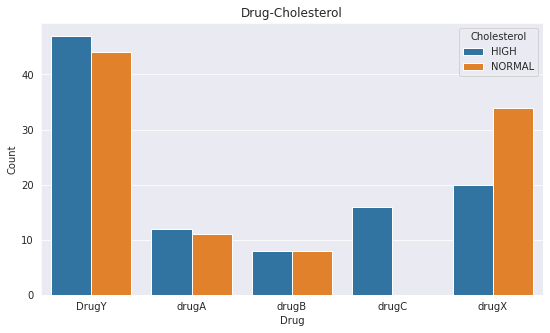

In [16]:
DrugChol = drug.groupby(['Drug', 'Cholesterol']).size().reset_index(name='Count')

plt.figure(figsize=(9,5))

sns.barplot(x='Drug', y='Count', hue='Cholesterol', data=DrugChol)
plt.title('Drug-Cholesterol')
plt.show()

# Drug C is only used for patients with high cholesterol.
# The drugs (A, B, and Y) appear to be balanced.
# Drug X is used in both cases, but more in patients with high cholesterol.

# WE LOOK FOR RELATIONSHIPS BETWEEN VARIABLES

## Figure 1. Graph Drug->Na_to_K with Cholesterol
## Figure 2. Graph Drug->Na_to_K with BP

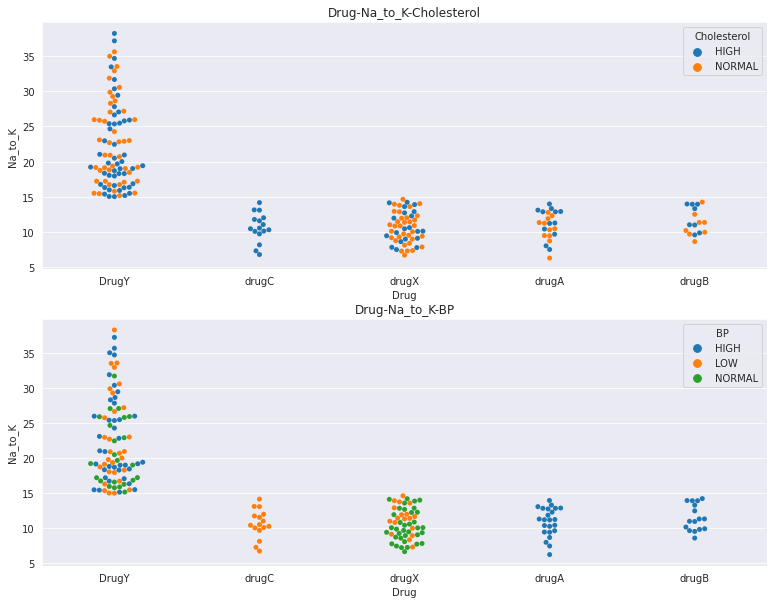

In [17]:
plt.figure(figsize=(13,10))

plt.subplot(211)
sns.swarmplot(x='Drug', y='Na_to_K', hue='Cholesterol', data=drug)
plt.title('Drug-Na_to_K-Cholesterol')
plt.subplot(212)
sns.swarmplot(x='Drug', y='Na_to_K', hue='BP', data=drug)
plt.title('Drug-Na_to_K-BP')

plt.show()


# Drug C is used only for people with high cholesterol and low blood pressure.
# We create a new column where the value will be 0 if Na_to_K is less than 15.015 and 1 if it is greater than this value.
# Na_to_k is very important


## We can create a new variable with the information from the Na_to_K column

### 0 <- if it is less than 15,015
### 1 <- if it is greater than 15,015

In [18]:
drug['GreaterNa15'] = [1 if i >= 15.015 else 0 for i in drug.Na_to_K]

drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,GreaterNa15
0,23,F,HIGH,HIGH,25.355,DrugY,1
1,47,M,LOW,HIGH,13.093,drugC,0
2,47,M,LOW,HIGH,10.114,drugC,0
3,28,F,NORMAL,HIGH,7.798,drugX,0
4,61,F,LOW,HIGH,18.043,DrugY,1


## Graph New Column Drug->GreaterNa15

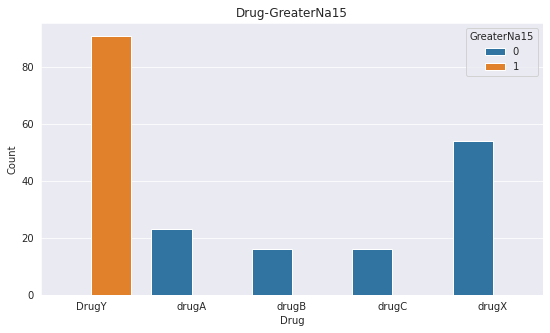

In [19]:
DrugGreater = drug.groupby(['Drug','GreaterNa15']).size().reset_index(name='Count')

plt.figure(figsize=(9,5))

sns.barplot(x='Drug', y='Count', hue='GreaterNa15', data = DrugGreater)
plt.title('Drug-GreaterNa15')
plt.show()

# Imputer data

In [20]:
from sklearn.impute import SimpleImputer

def impute(value, imp, dta):
    
    for i, j in zip(value, imp):
        
        impt = SimpleImputer(missing_values=i, strategy='constant', fill_value=j)
        
        impt.fit(drug[dta][:, np.newaxis])
        
        drug[dta] = impt.transform(drug[dta][:, np.newaxis])
        
    drug[dta] = drug[dta].astype(int)
    
    

### Values we use to impute

### run only once

In [21]:
feature = ['BP', 'Cholesterol']
Vimp = [[0,1,2],[0,1]]
Val = [['LOW','NORMAL','HIGH'],['NORMAL', 'HIGH']]

def imp(value, imput, feature):
    
    for i, j in enumerate(feature):
        
        impute(value[i], imput[i], j)
    
imp(Val, Vimp, feature)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is d

In [22]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,GreaterNa15
0,23,F,2,1,25.355,DrugY,1
1,47,M,0,1,13.093,drugC,0
2,47,M,0,1,10.114,drugC,0
3,28,F,1,1,7.798,drugX,0
4,61,F,0,1,18.043,DrugY,1


# Label Encoder

In [23]:
from sklearn.preprocessing import LabelEncoder

def Encoder(feature):
    
    le = LabelEncoder()
    
    drug[feature] = le.fit_transform(drug[feature])


### Encoder Drug

In [24]:
Encoder('Drug')

drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,GreaterNa15
0,23,F,2,1,25.355,0,1
1,47,M,0,1,13.093,3,0
2,47,M,0,1,10.114,3,0
3,28,F,1,1,7.798,4,0
4,61,F,0,1,18.043,0,1


In [25]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
 6   GreaterNa15  200 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 11.1+ KB


# Graph Boxplot
### we look for outliers

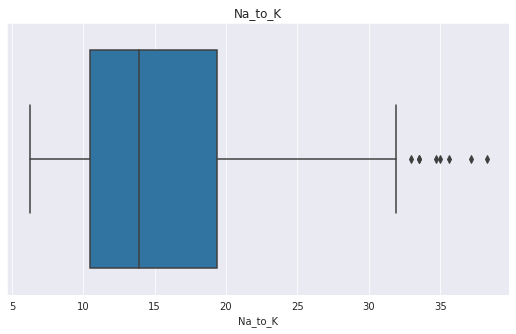

In [26]:
def boxplot(dta):
    
    plt.figure(figsize=(9,5))
    
    sns.boxplot(drug[dta])
    plt.title(dta)
    plt.show()
    
boxplot('Na_to_K')

# Outliers

## Removing outliers
#### repeat the process as many times as necessary

Min: 6.269
Max: 38.247
Quantile 25%: 10.445500000000001
Median: 13.936499999999999
Quantile 75%: 19.38
Interquartile range: 8.934499999999998
Lower quantile: 6.269
Upper quantile: 32.781749999999995
Shape: (192, 7)


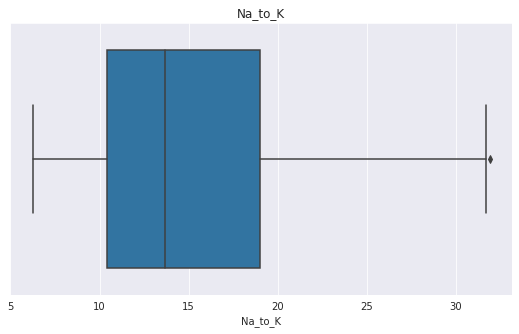

In [27]:
# Removing outliers

mn = np.min(drug.Na_to_K)
mx = np.max(drug.Na_to_K)
    
Q1 = drug.Na_to_K.quantile(0.25)
Q3 = drug.Na_to_K.quantile(0.75)
median = drug.Na_to_K.median()
IQR = Q3 - Q1
    
Qinf = Q1 - 1.5*IQR
if Qinf < mn:
        
    Qinf = mn
        
Qsup = Q3 + 1.5*IQR
if Qsup > mx:
        
    Qsup = mx
        
drug = drug[(drug.Na_to_K >= Qinf) & (drug.Na_to_K <= Qsup)]
    
print('Min: {}'.format(mn))
print('Max: {}'.format(mx))
print('Quantile 25%: {}'.format(Q1))
print('Median: {}'.format(median))
print('Quantile 75%: {}'.format(Q3))
print('Interquartile range: {}'.format(IQR))
print('Lower quantile: {}'.format(Qinf))
print('Upper quantile: {}'.format(Qsup))
print('Shape: {}'.format(drug.shape))
    
boxplot('Na_to_K')

# We prepare data for model training
#### -without the sex column because it does not have important information

In [28]:
frame = [drug.Age, drug.BP, drug.Cholesterol, drug.Na_to_K, drug.GreaterNa15]

X_data = pd.concat(frame, axis=1)
y = drug.Drug.copy()


# Scaling Data
## data = data / mean(data)

In [29]:
# Data scaling

X = X_data / np.mean(X_data)

X.head()

,Age,BP,Cholesterol,Na_to_K,GreaterNa15
0,0.518067,1.873171,1.939394,1.657985,2.313253
1,1.058658,0.000000,1.939394,0.856163,0.000000
2,1.058658,0.000000,1.939394,0.661363,0.000000
3,0.630690,0.936585,1.939394,0.509918,0.000000
4,1.374003,0.000000,1.939394,1.179847,2.313253


# train_test_split and LogisticRegresion(parameters)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=23)

lr = LogisticRegression(penalty='l2', C=0.67, solver='newton-cg', multi_class='multinomial', max_iter=100, random_state=34)
lr.fit(X_train, y_train)


LogisticRegression(C=0.67, multi_class='multinomial', random_state=34,
                   solver='newton-cg')

## Classification metric functions

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def ClasReport(model, y, X):
    
    pred = model.predict(X)
    
    cm_lr = confusion_matrix(y, pred)
    
    print(classification_report(y, pred))
    
    sns.heatmap(cm_lr, annot=True, cbar=False, cmap='Blues')
    
    plt.show()

## Print metrics

			Score TEST: 0.974025974025974
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      0.87      0.93        15
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00         4
           4       0.95      1.00      0.98        20

    accuracy                           0.97        77
   macro avg       0.97      0.97      0.97        77
weighted avg       0.98      0.97      0.97        77



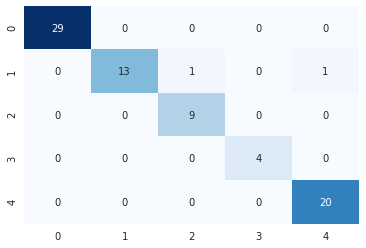


			Score TRAIN: 0.991304347826087
0.991304347826087
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      0.88      0.93         8
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        34

    accuracy                           0.99       115
   macro avg       0.97      0.97      0.97       115
weighted avg       0.99      0.99      0.99       115



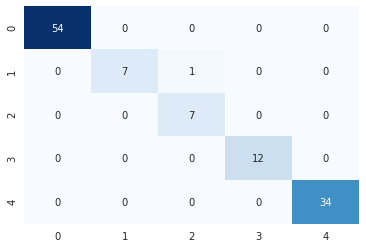

In [32]:
print('\t\t\tScore TEST: {}'.format(lr.score(X_test, y_test)))
ClasReport(lr, y_test, X_test)

print('\t\t======================================')

print()
print('\t\t\tScore TRAIN: {}'.format(lr.score(X_train, y_train)))
print(lr.score(X_train, y_train))
ClasReport(lr, y_train, X_train)

# Cross_val_score

In [33]:
from sklearn.model_selection import cross_val_score

def val_cross(model, _X, _y):

    print('5 CV:\n{}'.format(cross_val_score(model, _X, _y, cv=5)))
    print('Total: {}'.format(sum(cross_val_score(model, _X, _y, cv=5))/5))

    print('4 CV:\n{}'.format(cross_val_score(model, _X, _y, cv=4)))
    print('Total: {}'.format(sum(cross_val_score(model, X, y, cv=4))/4))

    print('3 CV:\n{}'.format(cross_val_score(model, _X, _y, cv=3)))
    print('Total: {}'.format(sum(cross_val_score(model, _X, _y, cv=3))/3))
    
val_cross(lr, X, y)

5 CV:
[1.         1.         0.97368421 0.94736842 1.        ]
Total: 0.9842105263157894
4 CV:
[1.     1.     0.9375 1.    ]
Total: 0.984375
3 CV:
[1.      1.      0.96875]
Total: 0.9895833333333334


# We balance the data

1. swing with SMOTETomek

In [34]:
from imblearn.combine import SMOTETomek

SmoteT = SMOTETomek(sampling_strategy='auto', random_state=0)

X_res, y_res = SmoteT.fit_sample(X, y)

print('X-X_res shape: {}-{}'.format(X.shape, X_res.shape))
print('y-y_res shape: {}-{}'.format(y.shape, y_res.shape))

X-X_res shape: (192, 5)-(415, 5)
y-y_res shape: (192,)-(415,)


### cross_val_score with SMOTETomek

In [35]:
val_cross(lr, X_res, y_res)

5 CV:
[1. 1. 1. 1. 1.]
Total: 1.0
4 CV:
[1. 1. 1. 1.]
Total: 0.984375
3 CV:
[0.99280576 1.         1.        ]
Total: 0.9976019184652278


2. swing with SMOTEENN

In [36]:
from imblearn.combine import SMOTEENN

SmoteENN = SMOTEENN(sampling_strategy='auto', random_state=0)

Xres, yres = SmoteENN.fit_sample(X, y)

print('X-Xres shape: {}-{}'.format(X.shape, Xres.shape))
print('y-yres shape: {}-{}'.format(y.shape, yres.shape))

X-Xres shape: (192, 5)-(412, 5)
y-yres shape: (192,)-(412,)


### cross_val_score with SMOTEENN

In [37]:
val_cross(lr, Xres, yres)

5 CV:
[1. 1. 1. 1. 1.]
Total: 1.0
4 CV:
[1. 1. 1. 1.]
Total: 0.984375
3 CV:
[0.99275362 1.         1.        ]
Total: 0.9975845410628019


# Conclusion

> As we can see, the probabilistic model (logistic regression) gives us a very good performance, of course entering the correct parameters.

> We rule out over-adjustment, due to the minimum difference in the training and validation metrics, and we can also observe that balancing the data, it maintains its performance; we can verify this in the cross-validation scores for these data.